In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Trend Line Equation: y = 0.4878x + 13.8758
R-squared: 0.0542
Pearson Correlation: 0.2328
P-value: 0.1656
T-test Statistic: -3.7751
P-value: 0.0003


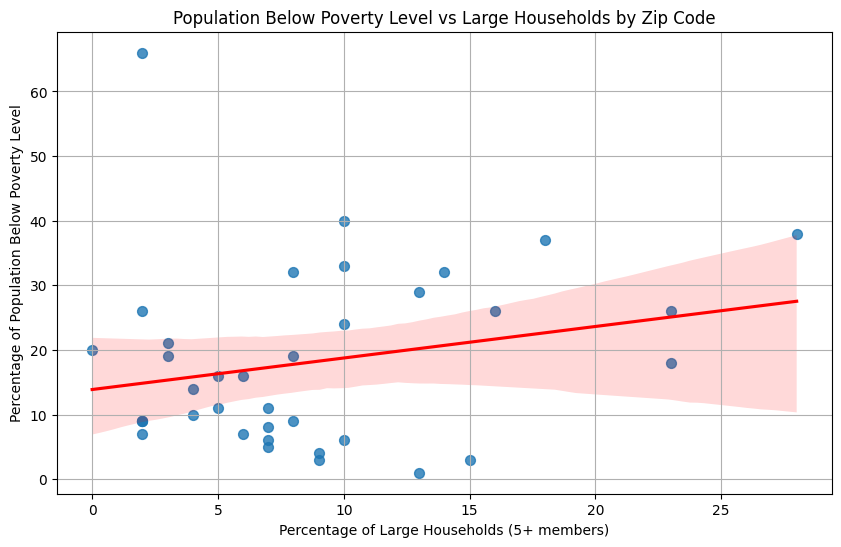

In [2]:
# Load the data
data = pd.read_csv('data/crime-housing-austin-2015.csv')
data['Zip_Code_Housing'] = data['Zip_Code_Housing'].astype(str)

largehousehold_data = data[['Zip_Code_Housing', 'Largehouseholds(5+members)']]
poverty_data = data[['Zip_Code_Housing', 'Populationbelowpovertylevel']]
largehousehold_data['Largehouseholds(5+members)'] = largehousehold_data['Largehouseholds(5+members)'].str.replace('%', '').astype('float')
poverty_data['Populationbelowpovertylevel'] = poverty_data['Populationbelowpovertylevel'].str.replace('%', '').astype('float')

largehousehold_agg = largehousehold_data.groupby('Zip_Code_Housing').mean().reset_index()
poverty_agg = poverty_data.groupby('Zip_Code_Housing').mean().reset_index()

merged_data = pd.merge(largehousehold_agg, poverty_agg, on='Zip_Code_Housing')
merged_data_cleaned = merged_data.dropna()

slope, intercept, r_value, p_value, std_err = stats.linregress(merged_data_cleaned['Largehouseholds(5+members)'], merged_data_cleaned['Populationbelowpovertylevel'])
print(f"Trend Line Equation: y = {slope:.4f}x + {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}")

# Pearson correlation
correlation, p_value = stats.pearsonr(merged_data_cleaned['Largehouseholds(5+members)'], merged_data_cleaned['Populationbelowpovertylevel'])
print(f"Pearson Correlation: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

# t-test
t_stat, t_p_value = stats.ttest_ind(merged_data_cleaned['Largehouseholds(5+members)'], merged_data_cleaned['Populationbelowpovertylevel'])
print(f"T-test Statistic: {t_stat:.4f}")
print(f"P-value: {t_p_value:.4f}")

plt.figure(figsize=(10, 6))
sns.regplot(x='Largehouseholds(5+members)', y='Populationbelowpovertylevel', data=merged_data_cleaned, scatter_kws={"s": 50}, line_kws={"color": "red"})

plt.title('Population Below Poverty Level vs Large Households by Zip Code')
plt.xlabel('Percentage of Large Households (5+ members)')
plt.ylabel('Percentage of Population Below Poverty Level')
plt.grid(True)
plt.show()


Trend Line Equation: y = 0.4878x + 13.8758
R-squared: 0.0542
Pearson Correlation: 0.2328
P-value: 0.1656
T-test Statistic: -3.7751
P-value: 0.0003


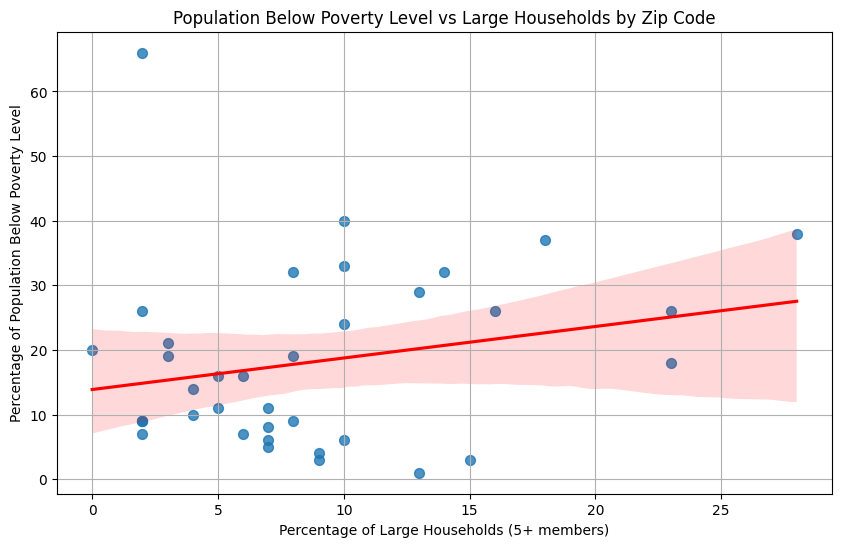

In [3]:
# Load the data
data = pd.read_csv('data/crime-housing-austin-2015.csv')
data['Zip_Code_Housing'] = data['Zip_Code_Housing'].astype(str)

largehousehold_data = data[['Zip_Code_Housing', 'Largehouseholds(5+members)']]
poverty_data = data[['Zip_Code_Housing', 'Populationbelowpovertylevel']]
largehousehold_data['Largehouseholds(5+members)'] = largehousehold_data['Largehouseholds(5+members)'].str.replace('%', '').astype('float')
poverty_data['Populationbelowpovertylevel'] = poverty_data['Populationbelowpovertylevel'].str.replace('%', '').astype('float')

largehousehold_agg = largehousehold_data.groupby('Zip_Code_Housing').mean().reset_index()
poverty_agg = poverty_data.groupby('Zip_Code_Housing').mean().reset_index()

merged_data = pd.merge(largehousehold_agg, poverty_agg, on='Zip_Code_Housing')
merged_data_cleaned = merged_data.dropna()

slope, intercept, r_value, p_value, std_err = stats.linregress(merged_data_cleaned['Largehouseholds(5+members)'], merged_data_cleaned['Populationbelowpovertylevel'])
print(f"Trend Line Equation: y = {slope:.4f}x + {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}")

# Pearson correlation
correlation, p_value = stats.pearsonr(merged_data_cleaned['Largehouseholds(5+members)'], merged_data_cleaned['Populationbelowpovertylevel'])
print(f"Pearson Correlation: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

# t-test
t_stat, t_p_value = stats.ttest_ind(merged_data_cleaned['Largehouseholds(5+members)'], merged_data_cleaned['Populationbelowpovertylevel'])
print(f"T-test Statistic: {t_stat:.4f}")
print(f"P-value: {t_p_value:.4f}")

plt.figure(figsize=(10, 6))
sns.regplot(x='Largehouseholds(5+members)', y='Populationbelowpovertylevel', data=merged_data_cleaned, scatter_kws={"s": 50}, line_kws={"color": "red"})

plt.title('Population Below Poverty Level vs Large Households by Zip Code')
plt.xlabel('Percentage of Large Households (5+ members)')
plt.ylabel('Percentage of Population Below Poverty Level')
plt.grid(True)
plt.show()


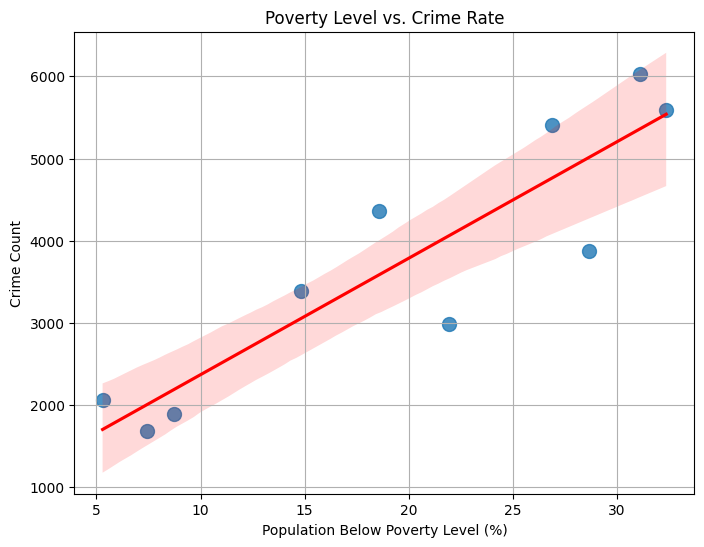

In [4]:
# Load the dataset
#file_path = 'C:/ROBIUL/Courses Fall 2024/Data Science Practice (CS5830)/project 2/crime-housing-austin-2015.csv'
data = pd.read_csv("data/crime-housing-austin-2015.csv")

# Cleaning the data: remove rows with missing values in important columns
data_clean = data.dropna(subset=['Council_District', 'Populationbelowpovertylevel'])

# Convert Council District to integer
data_clean['Council_District'] = data_clean['Council_District'].astype(int)

# Convert Population Below Poverty Level to numeric (removing % sign)
data_clean['Populationbelowpovertylevel'] = pd.to_numeric(data_clean['Populationbelowpovertylevel'].str.replace('%', ''))

# Group the data by district and calculate crime counts
crime_counts_by_district = data_clean['Council_District'].value_counts().sort_index()

# Prepare a dataframe with housing data aggregated by district
povertylevel_by_district = data_clean.groupby('Council_District').agg({'Populationbelowpovertylevel': 'mean'})

# Combine the crime counts with the povertylevel data
combined_data = pd.DataFrame(crime_counts_by_district)
combined_data = combined_data.join(povertylevel_by_district)
combined_data.reset_index(inplace=True)
combined_data

# Plotting Crime Count vs. Population Below Poverty Level
plt.figure(figsize=(8, 6))
sns.regplot(data= combined_data, x='Populationbelowpovertylevel', y='count', scatter_kws={"s": 100}, line_kws={"color": "red"})
#sns.lmplot(data= combined_data, x='Populationbelowpovertylevel', y='count', hue='Council_District')
plt.title('Poverty Level vs. Crime Rate')
plt.xlabel('Population Below Poverty Level (%)')
plt.ylabel('Crime Count')
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

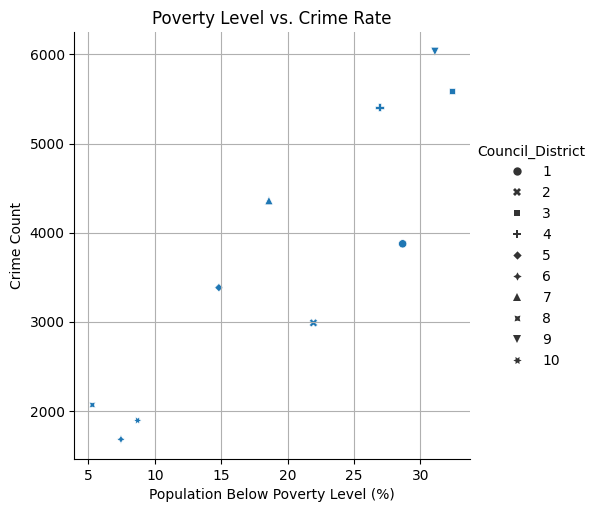

In [5]:
# Plotting Crime Count vs. Population Below Poverty Level by council district
plt.figure(figsize=(12, 6))
sns.relplot(data= combined_data, x='Populationbelowpovertylevel', y='count', style='Council_District')
plt.title('Poverty Level vs. Crime Rate')
plt.xlabel('Population Below Poverty Level (%)')
plt.ylabel('Crime Count')
plt.grid(True)
plt.show()